In [1]:
import numpy as np
from random import seed
from random import random
from random import randint
from random import randrange
from math import exp
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torch import nn
from collections import OrderedDict
import torch.nn.functional as F
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import  accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2


In [4]:
from google.colab import files
uploaded=files.upload()

Saving t20_international.csv to t20_international.csv


In [5]:
#Add features/labels that might be needed
dataset = pd.read_csv("t20_international.csv")



dataset["home_win"] = ""
dataset.to_csv("t20_international.csv", index=False)
for i in dataset.index:
  if(dataset.at[i,"home"]==dataset.at[i,"innings1"]):
    dataset.at[i,"innings1"]="yes"
  else:
    dataset.at[i,"innings1"]="no"
for i in dataset.index:
  if(dataset.at[i,"home"]==dataset.at[i,"winner"]):
    dataset.at[i,"home_win"]=1
  else:
    dataset.at[i,"home_win"]=0


dataset = dataset[pd.isnull(dataset['target'])]

dataset.head(5)

,match_id,series_id,match_details,result,scores,date,venue,round,home,away,winner,win_by_runs,win_by_wickets,balls_remaining,innings1,innings1_runs,innings1_wickets,innings1_overs_batted,innings1_overs,innings2,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target,home_win
0,211048,238218,Only T20I:New Zealand v Australia at Auckland-...,Australia won by 44 runs,Australia 214/5 (20/20 ov); New Zealand 170 (2...,17/02/2005,Auckland,Only T20I,New Zealand,Australia,Australia,44.0,NaN,NaN,no,214.0,5.0,20.0,20.0,New Zealand,170.0,10.0,20.0,20.0,NaN,NaN,0
1,211028,238219,Only T20I:England v Australia at Southampton- ...,England won by 100 runs,England 179/8 (20/20 ov); Australia 79 (14.3/2...,13/06/2005,Southampton,Only T20I,England,Australia,England,100.0,NaN,NaN,yes,179.0,8.0,20.0,20.0,Australia,79.0,10.0,14.3,20.0,NaN,NaN,1
2,222678,238166,Only T20I:South Africa v New Zealand at Johann...,New Zealand won by 5 wickets (with 12 balls re...,South Africa 133 (19.3/20 ov); New Zealand 134...,21/10/2005,Johannesburg,Only T20I,South Africa,New Zealand,New Zealand,NaN,5.0,12.0,yes,133.0,10.0,19.3,20.0,New Zealand,134.0,5.0,18.0,20.0,NaN,NaN,0
3,226374,226335,Only T20I:Australia v South Africa at Brisbane...,Australia won by 95 runs,Australia 209/3 (20/20 ov); South Africa 114 (...,09/01/2006,Brisbane,Only T20I,Australia,South Africa,Australia,95.0,NaN,NaN,yes,209.0,3.0,20.0,20.0,South Africa,114.0,10.0,18.3,20.0,NaN,NaN,1
4,237242,237244,Only T20I:New Zealand v West Indies at Aucklan...,Match tied (New Zealand won the bowl-out),West Indies 126/7 (20/20 ov); New Zealand 126/...,16/02/2006,Auckland,Only T20I,New Zealand,West Indies,New Zealand,NaN,NaN,NaN,no,126.0,7.0,20.0,20.0,New Zealand,126.0,8.0,20.0,20.0,NaN,NaN,1


In [27]:
#Filter out features that are not going to be used
dataset_filtered = dataset
dataset_filtered = dataset_filtered.drop("match_id", axis=1)
dataset_filtered = dataset_filtered.drop("series_id", axis=1)
dataset_filtered = dataset_filtered.drop("match_details", axis=1)
dataset_filtered = dataset_filtered.drop("result", axis=1)
dataset_filtered = dataset_filtered.drop("scores", axis=1)
dataset_filtered = dataset_filtered.drop("date", axis=1)

dataset_filtered = dataset_filtered.drop("round", axis=1)
dataset_filtered = dataset_filtered.drop("winner", axis=1)
dataset_filtered = dataset_filtered.drop("win_by_runs", axis=1)
dataset_filtered = dataset_filtered.drop("win_by_wickets", axis=1)
dataset_filtered = dataset_filtered.drop("balls_remaining", axis=1)

dataset_filtered = dataset_filtered.drop("innings1_wickets", axis=1)
dataset_filtered = dataset_filtered.drop("innings1_overs", axis=1)
dataset_filtered = dataset_filtered.drop("innings2", axis=1)
dataset_filtered = dataset_filtered.drop("innings2_runs", axis=1)
dataset_filtered = dataset_filtered.drop("innings2_wickets", axis=1)
dataset_filtered = dataset_filtered.drop("innings2_overs", axis=1)
dataset_filtered = dataset_filtered.drop("innings2_overs_batted", axis=1)
dataset_filtered = dataset_filtered.drop("innings1_overs_batted", axis=1)
dataset_filtered = dataset_filtered.drop("D/L_method", axis=1)
#dataset_filtered = dataset_filtered.drop("home_bat", axis=1)
dataset_filtered = dataset_filtered.drop("target", axis=1)
dataset_filtered1 = dataset_filtered
dataset_filtered1

,venue,home,away,innings1,innings1_runs,home_win
0,Auckland,New Zealand,Australia,no,214.0,0
1,Southampton,England,Australia,yes,179.0,1
2,Johannesburg,South Africa,New Zealand,yes,133.0,0
3,Brisbane,Australia,South Africa,yes,209.0,1
4,Auckland,New Zealand,West Indies,no,126.0,1
...,...,...,...,...,...,...
857,Port of Spain,West Indies,Pakistan,no,132.0,0
858,Port of Spain,West Indies,Pakistan,no,137.0,1
859,Port of Spain,West Indies,Pakistan,yes,124.0,0
860,Colombo (RPS),Sri Lanka,Bangladesh,no,155.0,1


In [10]:
enc = preprocessing.OrdinalEncoder()

#Preprocessing data using ordinal encoder

enc.fit(dataset_filtered[["venue","home", "away","innings1"]])

dataset_filtered[["venue","home", "away","innings1"]] = enc.transform(dataset_filtered[["venue","home", "away","innings1"]])
dataset_filtered = dataset_filtered.dropna()

X = dataset_filtered.loc[:, dataset_filtered.columns != 'home_win'].values
#X

#enc_x.fit(X)
#X = enc_x.transform(X)
y = dataset_filtered.loc[:, dataset_filtered.columns == 'home_win'].values
y=y.astype(int)
#enc_y.fit(y)
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logReg = RandomForestClassifier()

#Data training

logReg.fit(X_train, y_train.ravel())
y_pred = logReg.predict(X_test)
#Predict accuracy using the predicted vs test set
score = accuracy_score(y_test, y_pred)
print(score)


#Print new dataset
dataset_filtered




0.6975308641975309


,venue,home,away,innings1,innings1_runs,home_win
0,5.0,16.0,1.0,0.0,214.0,0
1,85.0,6.0,1.0,1.0,179.0,1
2,48.0,21.0,29.0,1.0,133.0,0
3,13.0,1.0,37.0,1.0,209.0,1
4,5.0,16.0,46.0,0.0,126.0,1
...,...,...,...,...,...,...
857,77.0,25.0,34.0,0.0,132.0,0
858,77.0,25.0,34.0,0.0,137.0,1
859,77.0,25.0,34.0,1.0,124.0,0
860,24.0,22.0,2.0,0.0,155.0,1


In [12]:
#ADABOOST using Stumps
dt = DecisionTreeClassifier(max_depth=1)
abc = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=1)
model = abc.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.5925925925925926


In [13]:
#Adaboost using Decision Trees of depth 2
dt = DecisionTreeClassifier(max_depth=2)
abc = AdaBoostClassifier(base_estimator=dt, n_estimators=100, learning_rate=1)
model = abc.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.7098765432098766


In [14]:
#ADABOOST using SVM SVC.
svc=SVC(probability=True, kernel='linear')

abc = AdaBoostClassifier(base_estimator=svc, n_estimators=100, learning_rate=1)
model = abc.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)


0.5061728395061729


In [ ]:
dataset1 = dataset.groupby("home").mean()
dataset1

,match_id,series_id,win_by_runs,win_by_wickets,balls_remaining,innings1_runs,innings1_wickets,innings1_overs_batted,innings1_overs,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
home,,,,,,,,,,,,,,,
Afghanistan,728256.338235,718135.970588,38.857143,6.161290,16.451613,147.863636,6.772727,19.560606,19.727273,128.469697,6.530303,17.883333,19.727273,NaN,NaN
Australia,539219.721311,533022.163934,39.344828,6.322581,18.612903,157.983607,6.721311,19.888525,20.000000,140.213115,6.245902,17.844262,20.000000,NaN,NaN
Bangladesh,693608.869565,679777.934783,36.461538,5.736842,11.842105,154.760870,6.543478,19.436957,19.717391,136.355556,6.422222,18.582222,19.888889,NaN,NaN
Bermuda,539758.526316,532649.894737,27.777778,7.800000,31.700000,133.578947,7.052632,19.863158,19.894737,121.157895,4.789474,16.915789,19.894737,NaN,NaN
Canada,548540.357143,543179.333333,35.941176,6.565217,16.521739,135.097561,6.951220,19.929268,20.000000,121.341463,5.487805,18.002439,20.000000,NaN,NaN
Cuba,300877.000000,300764.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Denmark,608469.545455,602238.727273,32.400000,7.200000,45.800000,129.400000,7.500000,19.850000,20.000000,114.300000,5.200000,16.110000,20.000000,NaN,NaN
England,533023.580645,524989.774194,24.033333,6.200000,11.400000,154.550000,6.500000,19.281667,19.666667,141.067797,5.576271,17.696610,19.661017,NaN,NaN
Hong Kong,798930.194444,793971.972222,50.500000,6.117647,13.176471,140.290323,7.225806,19.603226,19.677419,118.709677,6.161290,17.638710,19.677419,NaN,NaN


In [15]:
list_asia = ["Pakistan", "India", "Bangladesh", "Sri Lanka", "Afghanistan", "United Arab Erimates"]
non_asian=["Australia", "England", "South Africa", "West Indies", "Zimbabwe", "Ireland", "Scotland", "New Zealand", "Canada"]
dataset3 = dataset[dataset["home"].isin(list_asia)]
dataset3 = dataset3[dataset3["innings1"]=="no"]
dataset3 = dataset3[dataset3["away"].isin(non_asian)]
dataset3.groupby("away").mean()

,match_id,series_id,win_by_runs,win_by_wickets,balls_remaining,innings1_runs,innings1_wickets,innings1_overs_batted,innings1_overs,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
away,,,,,,,,,,,,,,,
Australia,722969.250000,710366.250000,85.000000,6.333333,6.000000,197.500000,5.250000,20.000000,20.000000,177.000000,5.000000,19.150000,20.000000,NaN,NaN
Canada,657873.000000,657780.000000,NaN,5.000000,1.000000,140.000000,6.000000,20.000000,20.000000,143.000000,5.000000,19.500000,20.000000,NaN,NaN
England,683479.333333,666251.000000,65.500000,5.000000,13.000000,165.000000,6.000000,20.000000,20.000000,121.666667,8.000000,18.233333,20.000000,NaN,NaN
Ireland,774360.166667,765928.500000,68.000000,7.400000,24.600000,140.000000,7.333333,18.533333,19.666667,131.500000,3.833333,15.833333,19.666667,NaN,NaN
New Zealand,600201.500000,591431.000000,29.000000,8.000000,13.000000,165.000000,6.400000,20.000000,20.000000,141.900000,7.500000,19.100000,20.000000,NaN,NaN
Scotland,482445.333333,481857.000000,34.000000,7.000000,15.000000,150.500000,7.000000,20.000000,20.000000,134.000000,6.500000,17.650000,20.000000,NaN,NaN
South Africa,658742.307692,648823.153846,29.222222,4.666667,6.000000,145.916667,4.916667,18.916667,18.916667,124.666667,7.833333,18.108333,18.916667,NaN,NaN
West Indies,685358.909091,669885.090909,46.800000,7.000000,17.666667,145.909091,6.545455,19.954545,20.000000,125.727273,5.363636,17.854545,20.000000,NaN,NaN
Zimbabwe,783426.125000,783418.875000,24.500000,4.500000,6.500000,152.625000,6.500000,19.537500,19.625000,148.250000,6.125000,18.562500,19.625000,NaN,NaN


In [ ]:
list_asia = ["Pakistan", "India", "Bangladesh", "Sri Lanka", "Afghanistan", "United Arab Erimates"]
dataset4 = dataset[dataset["home"].isin(list_asia)]
dataset4 = dataset4[dataset4["innings1"]=="yes"]
dataset4.groupby("home").mean()

,match_id,series_id,win_by_runs,win_by_wickets,balls_remaining,innings1_runs,innings1_wickets,innings1_overs_batted,innings1_overs,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
home,,,,,,,,,,,,,,,
Afghanistan,706167.514286,696057.200000,37.720000,5.700000,11.300000,154.400000,7.085714,19.791429,19.857143,128.114286,7.428571,18.714286,19.857143,NaN,NaN
Bangladesh,698515.333333,682488.166667,31.333333,5.727273,8.000000,143.666667,7.222222,18.761111,19.277778,137.352941,5.764706,18.564706,19.705882,NaN,NaN
India,699040.300000,689993.950000,22.625000,6.090909,6.818182,156.150000,6.650000,19.785000,20.000000,148.650000,5.800000,19.040000,20.000000,NaN,NaN
Pakistan,454182.636364,450435.181818,52.571429,6.500000,14.250000,155.909091,6.636364,19.954545,20.000000,123.181818,6.454545,18.672727,20.000000,NaN,NaN
Sri Lanka,639024.133333,631463.733333,30.000000,3.750000,7.750000,164.133333,5.866667,20.000000,20.000000,142.933333,7.933333,19.046667,20.000000,NaN,NaN


In [ ]:
non_asian=["Australia", "England", "South Africa", "West Indies", "Zimbabwe", "Ireland", "Scotland", "New Zealand", "Canada"]
dataset5 = dataset[dataset["home"].isin(non_asian)]
dataset5 = dataset5[dataset5["innings1"]=="yes"]
dataset5 = dataset5[dataset5["away"].isin(non_asian)]
dataset5.groupby("home").mean()

,match_id,series_id,win_by_runs,win_by_wickets,balls_remaining,innings1_runs,innings1_wickets,innings1_overs_batted,innings1_overs,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
home,,,,,,,,,,,,,,,
Australia,435799.466667,430620.733333,46.444444,5.500000,8.666667,174.333333,6.333333,20.000000,20.000000,147.000000,6.933333,18.813333,20.000000,NaN,NaN
Canada,473702.000000,466906.750000,4.000000,7.000000,31.500000,138.000000,6.500000,20.000000,20.000000,138.000000,5.750000,17.325000,20.000000,NaN,NaN
England,559479.230769,552117.153846,43.571429,6.000000,7.250000,146.846154,6.692308,17.746154,19.307692,125.583333,6.333333,16.541667,19.250000,NaN,NaN
Ireland,726687.500000,717075.166667,50.666667,6.000000,17.000000,157.833333,5.833333,19.833333,19.833333,134.200000,7.000000,17.520000,20.000000,NaN,NaN
New Zealand,487720.000000,487710.000000,57.333333,8.000000,30.666667,171.375000,6.875000,20.000000,20.000000,150.625000,5.375000,17.962500,20.000000,NaN,NaN
South Africa,550254.166667,545173.388889,31.500000,4.800000,8.000000,163.777778,6.000000,18.850000,18.888889,150.833333,6.500000,18.011111,18.888889,NaN,NaN
West Indies,585646.222222,585635.333333,33.666667,6.666667,12.666667,139.777778,7.666667,19.822222,20.000000,118.222222,6.888889,18.766667,20.000000,NaN,NaN
Zimbabwe,527012.000000,527009.000000,NaN,10.000000,39.000000,123.000000,8.000000,20.000000,20.000000,127.000000,0.000000,13.300000,20.000000,NaN,NaN


RANK 1:
Pakistan India Sri Lanka  Bangladesh

RANK 2: Australia England New Zealand

RANK 3: West Indies South Africa Afghanistan

RANK 4: Zimbabwe Scotland

In [16]:
#Data Initialization
group_1 = {
    "Pakistan":0,
    "New Zealand":0,
    "Australia":0,
    "West Indies":0,
    "Sri Lanka":0,
    "Scotland":0,
    

}
array1_name = ["Pakistan", "Sri Lanka", "Australia", "New Zealand", "West Indies", "Scotland"]
array1 = [7, 19, 1, 17, 48, 31]
venues_name = ["Dubai (DSC)", "Sharjah", "Abu Dhabi"]
venues = [32, 33, 31]
#Setting values given to each category via the Ordinal Encoder 
scores = [158,160,163,155,154, 135]
team_counter=0
loop_counter = 1
#Loop variables
while loop_counter <= 5:
  if team_counter == 5:
    break
  match_array = []
#Setting home team
  if team_counter < loop_counter:
    home = array1[team_counter]
    away = array1[loop_counter]
    
  else:
    away = array1[team_counter]
    home = array1[loop_counter]
  
  
#Randim initialization of venue
  venue = venues[randint(0,2)]
  match_array.append(venue)
  match_array.append(home)
  match_array.append(away)
  innings1 = randint(0,1)
#Random Initialization of toss
  if innings1==1:
    innings1=1
    innings1_runs = scores[team_counter]
  else:
    innings1_runs = scores[loop_counter]
    innings1=0
#Preparing a numpy array to pss to the Random Forest Classifier
  match_array.append(innings1)
  match_array.append(innings1_runs)
  trans_array = np.array([match_array])
  #match_array = enc.transform(trans_array)
#Predicting based on the dataset
  y_pred = logReg.predict(trans_array)
  y_pred2 = logReg.predict_proba(trans_array)
  print(y_pred2)
#Probability set to 0.4 to classify as a 1
  if float(y_pred2[:,1])>0.4:
    group_1[array1_name[team_counter]] += 2
    print(array1_name[team_counter]+" beat "+array1_name[loop_counter])
  else:
    group_1[array1_name[loop_counter]] += 2
    print(array1_name[loop_counter]+" beat "+array1_name[team_counter])

  loop_counter+=1
  #print(match_array)


  if loop_counter == 6:
    team_counter+=1
    loop_counter = team_counter+1

print(group_1)
    


[[0.57 0.43]]
Pakistan beat Sri Lanka
[[0.59 0.41]]
Pakistan beat Australia
[[0.63 0.37]]
New Zealand beat Pakistan
[[0.52 0.48]]
Pakistan beat West Indies
[[0.53 0.47]]
Pakistan beat Scotland
[[0.51 0.49]]
Sri Lanka beat Australia
[[0.52 0.48]]
Sri Lanka beat New Zealand
[[0.26 0.74]]
Sri Lanka beat West Indies
[[0.47 0.53]]
Sri Lanka beat Scotland
[[0.83 0.17]]
New Zealand beat Australia
[[0.49 0.51]]
Australia beat West Indies
[[0.61 0.39]]
Scotland beat Australia
[[0.65 0.35]]
West Indies beat New Zealand
[[0.48 0.52]]
New Zealand beat Scotland
[[0.81 0.19]]
Scotland beat West Indies
{'Pakistan': 8, 'New Zealand': 6, 'Australia': 2, 'West Indies': 2, 'Sri Lanka': 8, 'Scotland': 4}


In [17]:
group_2 = {
    "India":0,
    "Bangladesh":0,
    "England":0,
    "South Africa":0,
    "Afghanistan":0,
    "Zimbabwe":0,
    

}
#afg:48 ban:35 sa:22 eng:12 zim:51 ind:9
array1_name = ["India", "Bangladesh", "England", "South Africa", "Afghanistan", "Zimbabwe"]
array1 = [9, 35, 12, 22, 48, 51]
venues_name = ["Dubai (DSC)", "Sharjah", "Abu Dhabi"]
venues = [32, 33, 31]
scores = [170,149,165,159,146, 142]
team_counter=0
loop_counter = 1
while loop_counter <= 5:
  if team_counter == 5:
    break
  match_array = []

  if team_counter < loop_counter:
    home = array1[team_counter]
    away = array1[loop_counter]
    
  else:
    away = array1[team_counter]
    home = array1[loop_counter]
  
  

  venue = venues[randint(0,2)]
  match_array.append(venue)
  match_array.append(home)
  match_array.append(away)
  innings1 = randint(0,1)

  if innings1==1:
    innings1=1
    innings1_runs = scores[team_counter]
  else:
    innings1_runs = scores[loop_counter]
    innings1=0
  match_array.append(innings1)
  match_array.append(innings1_runs)
  trans_array = np.array([match_array])
  #match_array = enc.transform(trans_array)
  y_pred = logReg.predict(trans_array)
  y_pred2 = logReg.predict_proba(trans_array)
  print(y_pred2)
  if float(y_pred2[:,1])>0.4:
    group_2[array1_name[team_counter]] += 2
    print(array1_name[team_counter]+" beat "+array1_name[loop_counter])
  else:
    group_2[array1_name[loop_counter]] += 2
    print(array1_name[loop_counter]+" beat "+array1_name[team_counter])

  loop_counter+=1
  #print(match_array)


  if loop_counter == 6:
    team_counter+=1
    loop_counter = team_counter+1

print(group_2)


[[0.38 0.62]]
India beat Bangladesh
[[0.61 0.39]]
England beat India
[[0.54 0.46]]
India beat South Africa
[[0.5 0.5]]
India beat Afghanistan
[[0.33 0.67]]
India beat Zimbabwe
[[0.39 0.61]]
Bangladesh beat England
[[0.42 0.58]]
Bangladesh beat South Africa
[[0.74 0.26]]
Afghanistan beat Bangladesh
[[0.56 0.44]]
Bangladesh beat Zimbabwe
[[0.7 0.3]]
South Africa beat England
[[0.56 0.44]]
England beat Afghanistan
[[0.58 0.42]]
England beat Zimbabwe
[[0.62 0.38]]
Afghanistan beat South Africa
[[0.3 0.7]]
South Africa beat Zimbabwe
[[0.61 0.39]]
Zimbabwe beat Afghanistan
{'India': 8, 'Bangladesh': 6, 'England': 6, 'South Africa': 4, 'Afghanistan': 4, 'Zimbabwe': 2}


In [18]:
venues_name = ["Dubai (DSC)", "Sharjah", "Abu Dhabi"]
venues = [32, 33, 31]
array1_name = ["India","Pakistan"]
array1 = [9,7]
scores=[170,158]
team_counter=0
loop_counter = 1
while loop_counter <= 5:
  if team_counter == 1:
    break
  match_array = []

  if team_counter < loop_counter:
    home = array1[team_counter]
    away = array1[loop_counter]
    
  else:
    away = array1[team_counter]
    home = array1[loop_counter]
  
  

  venue = venues[randint(0,2)]
  match_array.append(venue)
  match_array.append(home)
  match_array.append(away)
  innings1 = randint(0,1)

  if innings1==1:
    innings1=1
    innings1_runs = scores[team_counter]
  else:
    innings1_runs = scores[loop_counter]
    innings1=0
  match_array.append(innings1)
  match_array.append(innings1_runs)
  trans_array = np.array([match_array])
  #match_array = enc.transform(trans_array)
  y_pred = logReg.predict(trans_array)
  y_pred2 = logReg.predict_proba(trans_array)
  print(y_pred2)
  if float(y_pred2[:,1])>0.5:
    #group_2[array1_name[team_counter]] += 2
    print(array1_name[team_counter]+" beat "+array1_name[loop_counter])
  else:
    #group_2[array1_name[loop_counter]] += 2
    print(array1_name[loop_counter]+" beat "+array1_name[team_counter])

  loop_counter+=1
  #print(match_array)
  break


  if loop_counter == 1:
    
    team_counter+=1
    loop_counter = team_counter+1


[[0.61 0.39]]
Pakistan beat India


In [19]:
venues_name = ["Dubai (DSC)", "Sharjah", "Abu Dhabi"]
venues = [32, 33, 31]
array1_name = ["Sri Lanka","South Africa"]
array1 = [19,22]
scores=[160,159]
team_counter=0
loop_counter = 1
while loop_counter <= 5:
  if team_counter == 1:
    break
  match_array = []

  if team_counter < loop_counter:
    home = array1[team_counter]
    away = array1[loop_counter]
    
  else:
    away = array1[team_counter]
    home = array1[loop_counter]
  
  

  venue = venues[randint(0,2)]
  match_array.append(venue)
  match_array.append(home)
  match_array.append(away)
  innings1 = randint(0,1)

  if innings1==1:
    innings1=1
    innings1_runs = scores[team_counter]
  else:
    innings1_runs = scores[loop_counter]
    innings1=0
  match_array.append(innings1)
  match_array.append(innings1_runs)
  trans_array = np.array([match_array])
  #match_array = enc.transform(trans_array)
  y_pred = logReg.predict(trans_array)
  y_pred2 = logReg.predict_proba(trans_array)
  print(y_pred2)
  if float(y_pred2[:,1])>0.5:
    #group_2[array1_name[team_counter]] += 2
    print(array1_name[team_counter]+" beat "+array1_name[loop_counter])
  else:
    #group_2[array1_name[loop_counter]] += 2
    print(array1_name[loop_counter]+" beat "+array1_name[team_counter])

  loop_counter+=1
  #print(match_array)
  break


  if loop_counter == 1:
    
    team_counter+=1
    loop_counter = team_counter+1

[[0.62 0.38]]
South Africa beat Sri Lanka


In [20]:
venues_name = ["Dubai (DSC)", "Sharjah", "Abu Dhabi"]
venues = [32, 33, 31]
array1_name = ["India","South Africa"]
array1 = [9,22]
scores=[170,159]
team_counter=0
loop_counter = 1
print("Final:")
while loop_counter <= 5:
  if team_counter == 1:
    break
  match_array = []

  if team_counter < loop_counter:
    home = array1[team_counter]
    away = array1[loop_counter]
    
  else:
    away = array1[team_counter]
    home = array1[loop_counter]
  
  

  venue = venues[randint(0,2)]
  match_array.append(venue)
  match_array.append(home)
  match_array.append(away)
  innings1 = randint(0,1)

  if innings1==1:
    innings1=1
    innings1_runs = scores[team_counter]
  else:
    innings1_runs = scores[loop_counter]
    innings1=0
  match_array.append(innings1)
  match_array.append(innings1_runs)
  trans_array = np.array([match_array])
  #match_array = enc.transform(trans_array)
  y_pred = logReg.predict(trans_array)
  y_pred2 = logReg.predict_proba(trans_array)
  print(y_pred2)
  if float(y_pred2[:,1])>0.5:
    #group_2[array1_name[team_counter]] += 2
    print(array1_name[team_counter]+" beat "+array1_name[loop_counter])
  else:
    #group_2[array1_name[loop_counter]] += 2
    print(array1_name[loop_counter]+" beat "+array1_name[team_counter])

  loop_counter+=1
  #print(match_array)
  break


  if loop_counter == 1:
    
    team_counter+=1
    loop_counter = team_counter+1

Final:
[[0.54 0.46]]
South Africa beat India


In [ ]:
countries=['Australia','Pakistan','New Zealand','South Africa','Zimbabwe','West Indies','India','England','Bangladesh','Sri Lanka']
dataset_innings1 = dataset_filtered1[dataset_filtered1['home'].isin(countries)]
dataset_innings1 = dataset_innings1.groupby("home").mean()
dataset_innings1

,innings1_runs
home,
Australia,157.983607
Bangladesh,154.760870
England,154.550000
India,150.350000
New Zealand,158.545455
Pakistan,149.518519
South Africa,154.545455
Sri Lanka,157.117647
West Indies,138.225806


In [ ]:
#innings score 130-140
latitude_westIndies=[26.489462]
logitude_westIndies=[-81.94768]
#innings score 141-155
latitude_2=[30.375321,20.593684, -17.824858, 23.684994,-26.2,55.378051] #pakistan, india, zimbabwe, bangladesh, SA, England
longitude_2=[69.345116,78.96288,31.053028,90.356331,28.2, -3.435973]
#innings score 156-160
latitude_3=[7.873054,-40.900557,-25.274398] #sri lanka, new zealand, australia
longitude_3= [80.771797, 174.885971,133.775136 ]


In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install -q pyproj==1.9.6

In [ ]:
from mpl_toolkits.basemap import Basemap


In [ ]:
#longitudes=[30.731277,-66.410847,6.927079,69.345116,174.763336,78.96288,28.2,90.40744,133.775136]
#latitudes=[-21.244198,18.234503,79.861244,30.375321,-36.848461,20.593684,-26.2,23.7104,-25.274398]

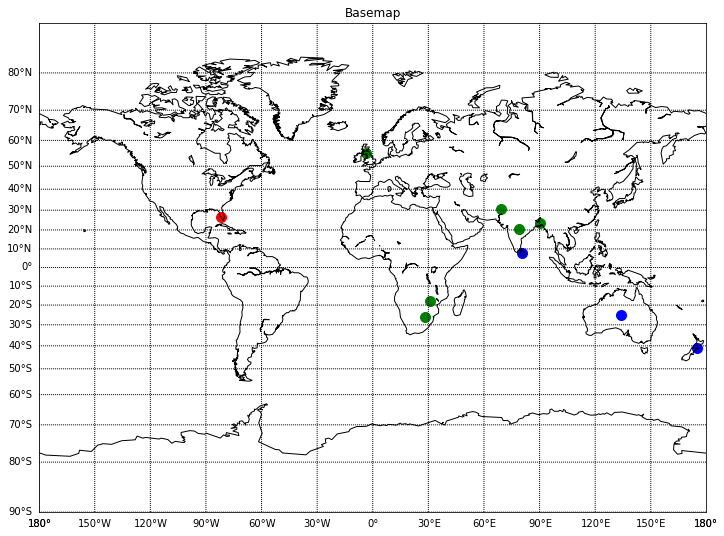

In [ ]:
fig= plt.figure(figsize = (12,9))
map = Basemap(projection='mill', llcrnrlat= -90, urcrnrlat= 90 , llcrnrlon= -180, urcrnrlon= 180, resolution = 'c')
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,10), labels=[True, False, False, False])
map.drawmeridians(np.arange(-180, 180, 30), labels=[0,0,0,1])
map.scatter(logitude_westIndies,latitude_westIndies,latlon=True, c='red', s=100) #score 130-140
map.scatter(longitude_2,latitude_2,latlon=True, c='green', s=100) #score 140-155
map.scatter(longitude_3,latitude_3,latlon=True, c='blue', s=100)  # score 156-160
plt.title('Basemap')
plt.show()

In [31]:
 #home win percentage
countries = ['Australia','Bangladesh', 'England', 'India', 'Ireland', 'New Zealand','Pakistan', 'Scotland','South Africa', 'West Indies','Zimbabwe']
dataset_percentage = dataset_filtered1[dataset_filtered1['home'].isin (countries)]
dataset_percentage = dataset_percentage.groupby('home')['home_win'].sum()#.plot(kind='bar')
dataset_percentage

home
Australia       33
Bangladesh      14
England         34
India           24
Ireland         25
New Zealand     28
Pakistan        19
Scotland        10
South Africa    25
West Indies     15
Zimbabwe         3
Name: home_win, dtype: int64

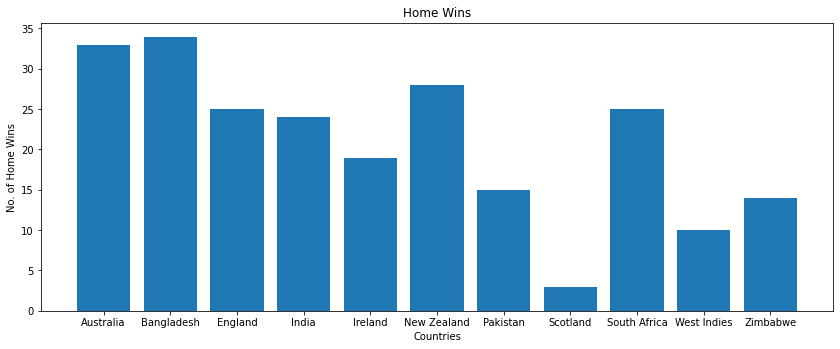

In [23]:
fig = plt.figure(figsize=(11,4))
ax = fig.add_axes([0,0,1,1])
wins = [33, 34, 25, 24, 19, 28, 15, 3, 25, 10, 14]
ax.bar(countries, wins)

plt.title('Home Wins')
plt.xlabel('Countries')
plt.ylabel('No. of Home Wins')
plt.show()


In [32]:
#year wise score
import datetime
dataset_year = dataset
#extracting year from the date
dataset_year['date'] = pd.to_datetime(dataset_year['date'],format='%d/%m/%Y')
dataset_year['year'] = pd.DatetimeIndex(dataset_year['date']).year
#grouping by year
dataset_year = dataset_year.groupby('year').mean().sort_values('year', ascending=True)
dataset_year

,match_id,series_id,win_by_runs,win_by_wickets,balls_remaining,innings1_runs,innings1_wickets,innings1_overs_batted,innings1_overs,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target
year,,,,,,,,,,,,,,,
2005,2.149180e+05,2.382010e+05,72.000000,5.000000,12.000000,175.333333,7.666667,19.766667,20.000000,127.666667,8.333333,17.433333,20.000000,NaN,NaN
2006,2.418704e+05,2.390516e+05,35.500000,6.250000,27.000000,147.111111,7.777778,19.677778,20.000000,132.111111,6.000000,17.677778,20.000000,NaN,NaN
2007,2.888652e+05,2.871990e+05,45.777778,6.476190,19.047619,158.925000,7.325000,19.672500,19.825000,139.350000,5.800000,17.842500,19.825000,NaN,NaN
2008,3.424933e+05,3.412861e+05,41.100000,6.117647,15.823529,126.655172,7.655172,19.320690,19.586207,113.793103,5.827586,17.762069,19.586207,NaN,NaN
2009,3.683229e+05,3.559517e+05,35.153846,6.052632,11.000000,157.086957,6.456522,19.595652,19.673913,135.000000,6.217391,17.963043,19.673913,NaN,NaN
2010,4.336266e+05,4.269312e+05,31.648649,6.384615,18.666667,143.202532,7.126582,19.848101,20.000000,128.341772,6.025316,17.710127,20.000000,NaN,NaN
2011,5.158808e+05,5.130955e+05,39.208333,6.050000,13.700000,151.363636,6.931818,19.731818,20.000000,130.818182,6.409091,18.165909,20.000000,NaN,NaN
2012,5.458425e+05,5.388711e+05,34.922078,6.634921,17.968254,145.089655,6.420690,19.655172,19.731034,127.020833,5.937500,17.947222,19.736111,NaN,NaN
2013,6.419561e+05,6.404992e+05,35.212121,6.203390,15.440678,148.269841,6.373016,19.672222,19.880952,131.848000,6.200000,18.172800,19.880000,NaN,NaN


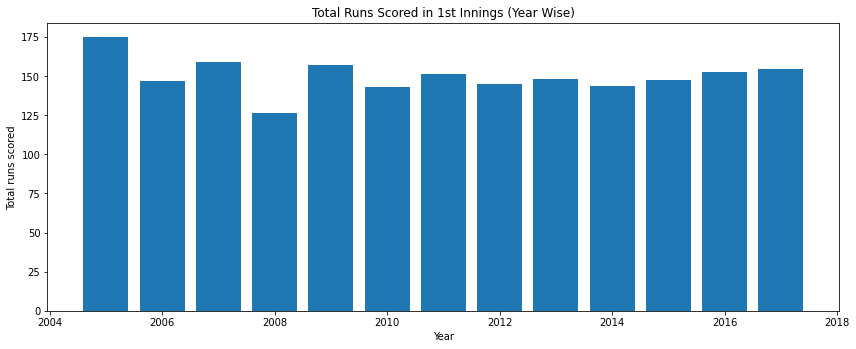

In [33]:
fig = plt.figure(figsize=(11,4))
ax = fig.add_axes([0,0,1,1])
innings1_Score = dataset_year['innings1_runs']
year_list = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax.bar(year_list, innings1_Score)

plt.title('Total Runs Scored in 1st Innings (Year Wise)')
plt.xlabel('Year')
plt.ylabel('Total runs scored')
plt.show()

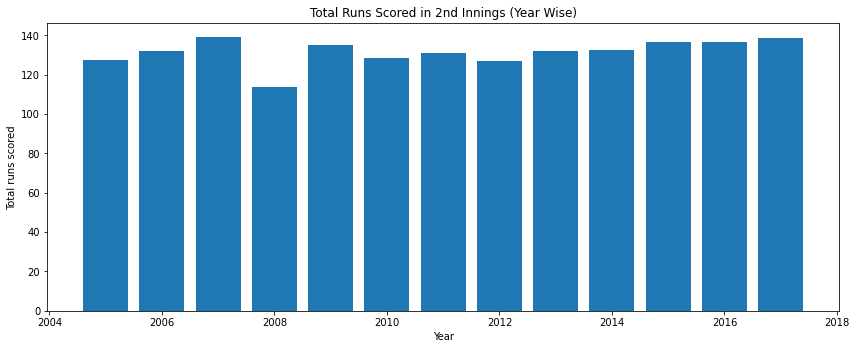

In [34]:
fig = plt.figure(figsize=(11,4))
ax = fig.add_axes([0,0,1,1])
innings2_Score = dataset_year['innings2_runs']
year_list = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax.bar(year_list, innings2_Score)

plt.title('Total Runs Scored in 2nd Innings (Year Wise)')
plt.xlabel('Year')
plt.ylabel('Total runs scored')
plt.show()

In [35]:
#total runs column
dataset_year['runs scored'] = dataset_year['innings1_runs'] + dataset_year['innings2_runs']
dataset_year

,match_id,series_id,win_by_runs,win_by_wickets,balls_remaining,innings1_runs,innings1_wickets,innings1_overs_batted,innings1_overs,innings2_runs,innings2_wickets,innings2_overs_batted,innings2_overs,D/L_method,target,runs scored
year,,,,,,,,,,,,,,,,
2005,2.149180e+05,2.382010e+05,72.000000,5.000000,12.000000,175.333333,7.666667,19.766667,20.000000,127.666667,8.333333,17.433333,20.000000,NaN,NaN,303.000000
2006,2.418704e+05,2.390516e+05,35.500000,6.250000,27.000000,147.111111,7.777778,19.677778,20.000000,132.111111,6.000000,17.677778,20.000000,NaN,NaN,279.222222
2007,2.888652e+05,2.871990e+05,45.777778,6.476190,19.047619,158.925000,7.325000,19.672500,19.825000,139.350000,5.800000,17.842500,19.825000,NaN,NaN,298.275000
2008,3.424933e+05,3.412861e+05,41.100000,6.117647,15.823529,126.655172,7.655172,19.320690,19.586207,113.793103,5.827586,17.762069,19.586207,NaN,NaN,240.448276
2009,3.683229e+05,3.559517e+05,35.153846,6.052632,11.000000,157.086957,6.456522,19.595652,19.673913,135.000000,6.217391,17.963043,19.673913,NaN,NaN,292.086957
2010,4.336266e+05,4.269312e+05,31.648649,6.384615,18.666667,143.202532,7.126582,19.848101,20.000000,128.341772,6.025316,17.710127,20.000000,NaN,NaN,271.544304
2011,5.158808e+05,5.130955e+05,39.208333,6.050000,13.700000,151.363636,6.931818,19.731818,20.000000,130.818182,6.409091,18.165909,20.000000,NaN,NaN,282.181818
2012,5.458425e+05,5.388711e+05,34.922078,6.634921,17.968254,145.089655,6.420690,19.655172,19.731034,127.020833,5.937500,17.947222,19.736111,NaN,NaN,272.110489
2013,6.419561e+05,6.404992e+05,35.212121,6.203390,15.440678,148.269841,6.373016,19.672222,19.880952,131.848000,6.200000,18.172800,19.880000,NaN,NaN,280.117841


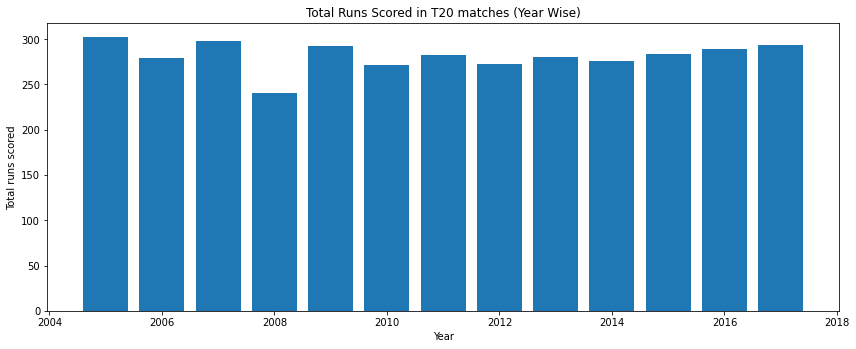

In [36]:
fig = plt.figure(figsize=(11,4))
ax = fig.add_axes([0,0,1,1])
total_runs = dataset_year['runs scored']
year_list = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
ax.bar(year_list, total_runs)

plt.title('Total Runs Scored in T20 matches (Year Wise)')
plt.xlabel('Year')
plt.ylabel('Total runs scored')
plt.show()